In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

/home/eigensim/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# directory variables (fixed)

dataLoc = '../_data/'
trainfile = 'train_03_997.csv'
old_trainfile = 'train.csv'
testfile = 'test_clean.csv'
old_testfile = 'test.csv'
train_171016 = '171016_dow_hr_pas_L2_dur_only.csv'
disturb_file = 'train_03_997_disturb.csv'

In [5]:
#train.csv

orig_df = pd.read_csv(dataLoc + old_trainfile,
                     infer_datetime_format=True,
                     parse_dates=['pickup_datetime'])
orig_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
701773,id3888279,1,2016-01-01 00:01:00,1/1/16 0:05,1,-73.982292,40.751331,-73.991341,40.750340,N,280
701774,id1210365,2,2016-01-01 00:01:00,1/1/16 0:07,5,-73.965279,40.801041,-73.947479,40.815170,N,408
701775,id0924227,1,2016-01-01 00:01:00,1/1/16 0:13,1,-73.970108,40.759800,-73.989357,40.742989,N,736
701776,id0190469,2,2016-01-01 00:00:00,1/1/16 0:14,5,-73.981743,40.719158,-73.938828,40.829182,N,849
701777,id1665586,1,2016-01-01 00:00:00,1/1/16 0:22,1,-73.985085,40.747166,-73.958038,40.717491,N,1294


In [6]:
orig_df['store_and_fwd_flag'].replace(['N', 'Y'], [0, 1], inplace = True) #inplace=True로 데이터프레임에 입력됨
orig_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
701773,id3888279,1,2016-01-01 00:01:00,1/1/16 0:05,1,-73.982292,40.751331,-73.991341,40.750340,0,280
701774,id1210365,2,2016-01-01 00:01:00,1/1/16 0:07,5,-73.965279,40.801041,-73.947479,40.815170,0,408
701775,id0924227,1,2016-01-01 00:01:00,1/1/16 0:13,1,-73.970108,40.759800,-73.989357,40.742989,0,736
701776,id0190469,2,2016-01-01 00:00:00,1/1/16 0:14,5,-73.981743,40.719158,-73.938828,40.829182,0,849
701777,id1665586,1,2016-01-01 00:00:00,1/1/16 0:22,1,-73.985085,40.747166,-73.958038,40.717491,0,1294


In [7]:
orig_df.shape

(701778, 11)

In [9]:
print(np.percentile(orig_df['trip_duration'], 0))
print(np.percentile(orig_df['pickup_longitude'], 0))
print(np.percentile(orig_df['pickup_latitude'], 0))
print(np.percentile(orig_df['dropoff_longitude'], 0))
print(np.percentile(orig_df['dropoff_latitude'], 0))

1.0
-78.54740143
34.35969543
-79.81797791
32.1811409


In [5]:
print(np.percentile(orig_df['trip_duration'], 100))
print(np.percentile(orig_df['pickup_longitude'], 100))
print(np.percentile(orig_df['pickup_latitude'], 100))
print(np.percentile(orig_df['dropoff_longitude'], 100))
print(np.percentile(orig_df['dropoff_latitude'], 100))

3526282.0
-61.33552933
43.48688507
-61.33552933
43.67399979


In [7]:
lower_p_lng = np.percentile(orig_df['pickup_longitude'], 0.3)
upper_p_lng = np.percentile(orig_df['pickup_longitude'], 99.7)

lower_p_lat = np.percentile(orig_df['pickup_latitude'], 0.3)
upper_p_lat = np.percentile(orig_df['pickup_latitude'], 99.7)

lower_d_lng = np.percentile(orig_df['dropoff_longitude'], 0.3)
upper_d_lng = np.percentile(orig_df['dropoff_longitude'], 99.7)

lower_d_lat = np.percentile(orig_df['dropoff_latitude'], 0.3)
upper_d_lat = np.percentile(orig_df['dropoff_latitude'], 99.7)

lower_dur = np.percentile(orig_df['trip_duration'], 0.3)
upper_dur = np.percentile(orig_df['trip_duration'], 99.7)

In [7]:
orig_df['store_and_fwd_flag_binom'] = orig_df['store_and_fwd_flag']
del orig_df['store_and_fwd_flag']
orig_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_binom
701773,id3888279,1,2016-01-01 00:01:00,1/1/16 0:05,1,-73.982292,40.751331,-73.991341,40.750340,280,0
701774,id1210365,2,2016-01-01 00:01:00,1/1/16 0:07,5,-73.965279,40.801041,-73.947479,40.815170,408,0
701775,id0924227,1,2016-01-01 00:01:00,1/1/16 0:13,1,-73.970108,40.759800,-73.989357,40.742989,736,0
701776,id0190469,2,2016-01-01 00:00:00,1/1/16 0:14,5,-73.981743,40.719158,-73.938828,40.829182,849,0
701777,id1665586,1,2016-01-01 00:00:00,1/1/16 0:22,1,-73.985085,40.747166,-73.958038,40.717491,1294,0


In [8]:
for i in range(5, 9+1):
    lower = np.percentile(orig_df.iloc[:, i], 0.3)
    upper = np.percentile(orig_df.iloc[:, i], 99.7)
    filtered_df = orig_df[(orig_df.iloc[:, i] > lower) & (orig_df.iloc[:, i] < upper)]
    
# pickup, dropoff, duration 의 각 상위 하위 0.3% 제거

In [9]:
print(filtered_df.shape)
filtered_df.tail()

(697516, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_binom
701773,id3888279,1,2016-01-01 00:01:00,1/1/16 0:05,1,-73.982292,40.751331,-73.991341,40.750340,280,0
701774,id1210365,2,2016-01-01 00:01:00,1/1/16 0:07,5,-73.965279,40.801041,-73.947479,40.815170,408,0
701775,id0924227,1,2016-01-01 00:01:00,1/1/16 0:13,1,-73.970108,40.759800,-73.989357,40.742989,736,0
701776,id0190469,2,2016-01-01 00:00:00,1/1/16 0:14,5,-73.981743,40.719158,-73.938828,40.829182,849,0
701777,id1665586,1,2016-01-01 00:00:00,1/1/16 0:22,1,-73.985085,40.747166,-73.958038,40.717491,1294,0


In [10]:
disturb_df = filtered_df[['vendor_id', 'passenger_count', 'store_and_fwd_flag_binom', 'trip_duration']] #selected columns

disturb_df.rename(columns = {'store_and_fwd_flag_binom' : 'store_and_fwd_flag'}, inplace = True)
#renamed columns

print(disturb_df.shape)
disturb_df.tail()

(697516, 4)


/home/eigensim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,vendor_id,passenger_count,store_and_fwd_flag,trip_duration
701773,1,1,0,280
701774,2,5,0,408
701775,1,1,0,736
701776,2,5,0,849
701777,1,1,0,1294


In [11]:
disturb_df.to_csv('../_data/train_03_997_disturb.csv')

In [ ]:
#disturb_df = pd.read_csv(dataLoc + disturb_file)
#print(disturb_df.shape)
#disturb_df.tail()

In [12]:
x = disturb_df.iloc[:, :]
y = disturb_df.iloc[:, :]

disturb_xcols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag']

In [33]:
print(plt.style.available)

['_classic_test', 'seaborn-talk', 'dark_background', 'seaborn-paper', 'seaborn', 'seaborn-notebook', 'seaborn-poster', 'seaborn-dark-palette', 'seaborn-bright', 'grayscale', 'seaborn-muted', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-darkgrid', 'seaborn-white', 'seaborn-pastel', 'bmh', 'seaborn-ticks', 'ggplot', 'classic', 'seaborn-deep', 'fivethirtyeight']


In [47]:
disturb_df['passenger_count'].value_counts()

1    494652
2     99862
5     37921
3     28187
6     23385
4     13494
0        14
8         1
Name: passenger_count, dtype: int64

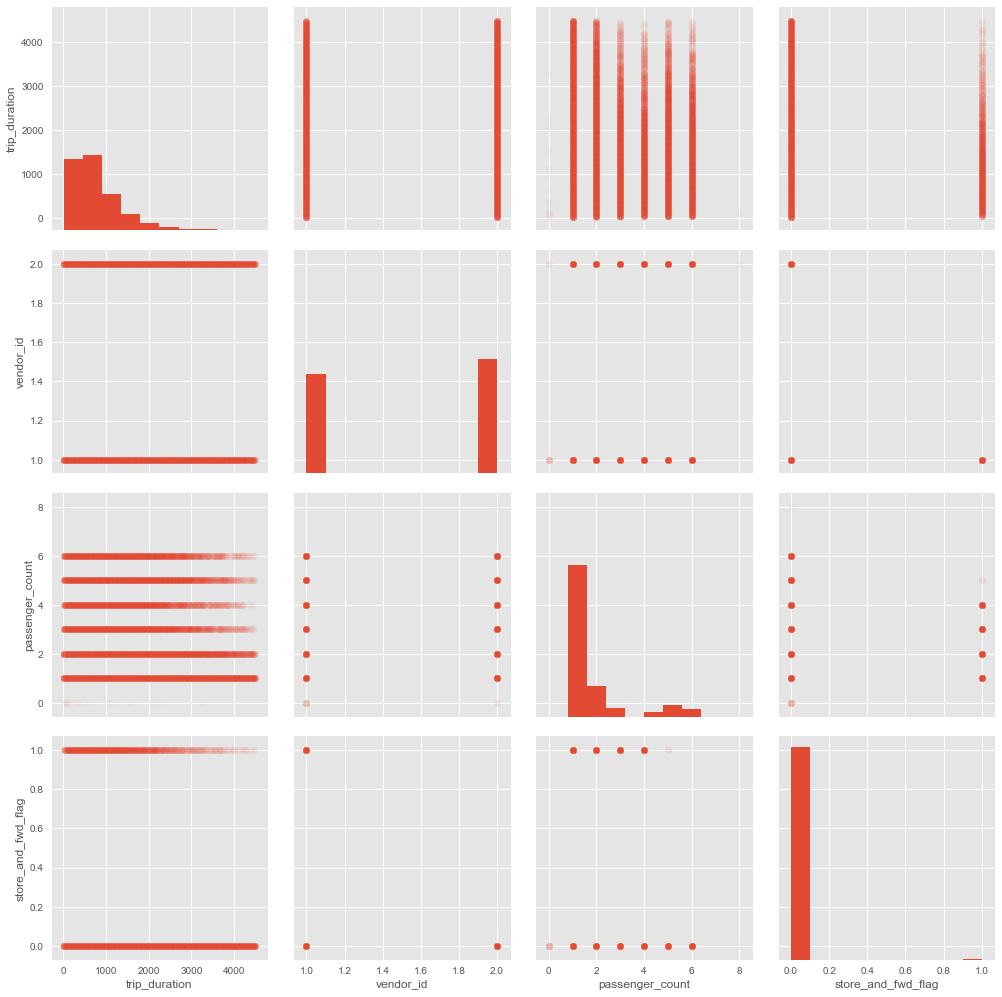

In [13]:
with plt.style.context(('ggplot')): #~.stye.context = Temporary styling
    sns_plot = sns.pairplot(pd.concat([y.trip_duration, x[disturb_xcols[:]]], axis=1), size=3.5, plot_kws={"s": 50, 'alpha' : 0.03}) 
plt.show()